In [1]:
import pickle

with open('C:/Users/LG/bigcontest/dataset/CJ_DATA.bin', 'rb') as f:
    cj_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/GS_DATA.bin', 'rb') as f:
    gs_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/WS_DATA.bin', 'rb') as f:
    ws_data = pickle.load(f) 

In [2]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import numpy as np

In [173]:
ws_data.keys()

dict_keys(['WS_MENTION', 'WS_SENTIMENT', 'WS_TOPIC', 'COL_CHANGE_DICT', 'INDUSTRY_CODE_DICT', 'GEO_CODE_DICT'])

## 신한 데이터

In [5]:
sh_data.keys()

dict_keys(['SH_RESIDENT', 'SH_FOREIGN', 'INDUSTRY_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])

In [177]:
resident = sh_data['SH_RESIDENT']
foreign = sh_data['SH_FOREIGN']

### 연도별 나이, 성별에 따른 사용금액

In [7]:
year_2019 = resident.loc[resident['YEAR']==2019]
year_2020 = resident.loc[resident['YEAR']==2020]
year_2019

,DATE,YEAR,MONTH,DAY,GU_CODE,DONG_CODE,INDUSTRY_CODE,SEX,AGE,USE_CNT,USE_AMT,SI_CODE,TOTAL_CODE
0,2019-02-01,2019,2,1,11,517,10,F,25,11,595,27,2711517
1,2019-02-01,2019,2,1,11,517,10,F,50,5,243,27,2711517
2,2019-02-01,2019,2,1,11,517,10,F,55,5,27,27,2711517
3,2019-02-01,2019,2,1,11,517,10,M,20,11,243,27,2711517
4,2019-02-01,2019,2,1,11,517,10,M,25,11,433,27,2711517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310601,2019-05-31,2019,5,31,35,720,81,M,45,9,48,11,1135720
1310602,2019-05-31,2019,5,31,35,720,81,M,50,13,72,11,1135720
1310603,2019-05-31,2019,5,31,35,720,81,M,60,9,99,11,1135720
1310604,2019-05-31,2019,5,31,35,720,81,M,65,9,133,11,1135720


In [8]:
age_sex_to_amt_2019 = year_2019.groupby(['AGE','SEX'])['USE_AMT'].sum()
age_sex_to_amt_2020 = year_2020.groupby(['AGE','SEX'])['USE_AMT'].sum()
age_sex_to_amt_2019

AGE  SEX
20   F      129211688
     M       81043488
25   F      208602912
     M      198698297
30   F      197681198
     M      196439126
35   F      215251802
     M      222271236
40   F      211829728
     M      205826512
45   F      254723083
     M      237216774
50   F      216990951
     M      208939360
55   F      166356823
     M      159109105
60   F      119337506
     M      113268763
65   F      116674312
     M      149857455
Name: USE_AMT, dtype: int64

In [9]:
label_2019 = []
for i in range(len(age_sex_to_amt_2019)):
    label_2019.append(str(age_sex_to_amt_2019.index[i][0])+age_sex_to_amt_2019.index[i][1])
label_2020 = []
for i in range(len(age_sex_to_amt_2020)):
    label_2020.append(str(age_sex_to_amt_2020.index[i][0])+age_sex_to_amt_2020.index[i][1])

['20F',
 '20M',
 '25F',
 '25M',
 '30F',
 '30M',
 '35F',
 '35M',
 '40F',
 '40M',
 '45F',
 '45M',
 '50F',
 '50M',
 '55F',
 '55M',
 '60F',
 '60M',
 '65F',
 '65M']

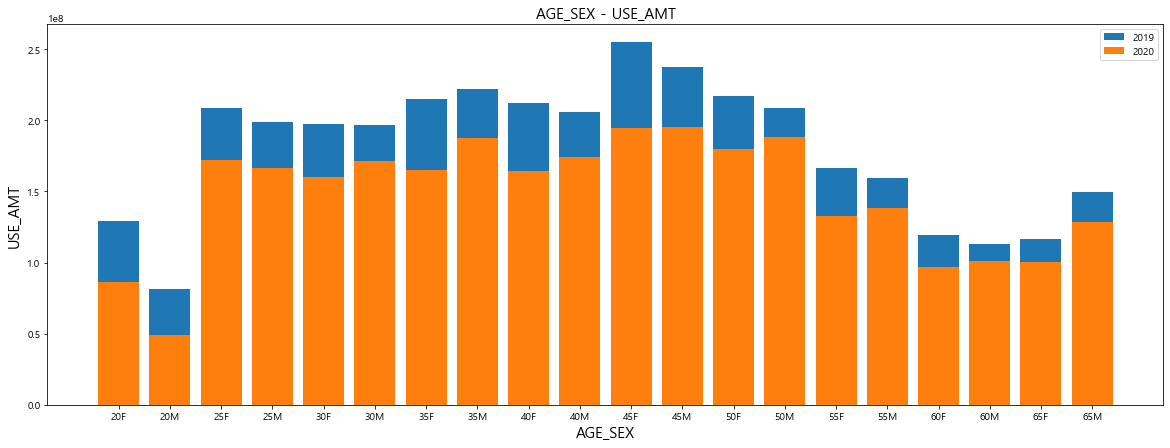

In [10]:
age_sex_to_amt = resident.groupby(['AGE','SEX'])['USE_AMT'].sum()


# 그래프 그리기
index = np.arange(len(label_2019))

plt.figure(figsize = (20,7))

plt.subplot(1,1,1)
plt.bar(index, age_sex_to_amt_2019,label='2019')
plt.bar(index, age_sex_to_amt_2020,label='2020')
plt.xticks(index, label_2019)
plt.xlabel('AGE_SEX', fontsize = 15)
plt.ylabel('USE_AMT', fontsize = 15)
plt.title("AGE_SEX - USE_AMT", fontsize = 15)
plt.legend()

plt.show()

### 연도별 시에 따른 나이,성별 사용금액

In [33]:
total_2019 = resident.loc[resident['YEAR']==2019]
seoul_2019=total_2019.loc[total_2019['SI_CODE']=='11']
daegu_2019=total_2019.loc[total_2019['SI_CODE']=='27']

total_2020 = resident.loc[resident['YEAR']==2020]
seoul_2020=total_2020.loc[total_2020['SI_CODE']=='11']
daegu_2020=total_2020.loc[total_2020['SI_CODE']=='27']

In [34]:
seoul_2020

,DATE,YEAR,MONTH,DAY,GU_CODE,DONG_CODE,INDUSTRY_CODE,SEX,AGE,USE_CNT,USE_AMT,SI_CODE,TOTAL_CODE
1312322,2020-02-01,2020,2,1,14,520,10,F,20,27,4509,11,1114520
1312323,2020-02-01,2020,2,1,14,520,10,F,25,62,5963,11,1114520
1312324,2020-02-01,2020,2,1,14,520,10,F,30,40,4229,11,1114520
1312325,2020-02-01,2020,2,1,14,520,10,F,35,53,9128,11,1114520
1312326,2020-02-01,2020,2,1,14,520,10,F,40,18,9157,11,1114520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537748,2020-05-31,2020,5,31,35,720,81,M,45,19,127,11,1135720
2537749,2020-05-31,2020,5,31,35,720,81,M,50,33,211,11,1135720
2537750,2020-05-31,2020,5,31,35,720,81,M,55,9,61,11,1135720
2537751,2020-05-31,2020,5,31,35,720,81,M,60,19,194,11,1135720


In [38]:
seoul_to_amt_2019 = seoul_2019.groupby(['AGE','SEX'])['USE_AMT'].sum()
daegu_to_amt_2019 = daegu_2019.groupby(['AGE','SEX'])['USE_AMT'].sum()

seoul_to_amt_2020 = seoul_2020.groupby(['AGE','SEX'])['USE_AMT'].sum()
daegu_to_amt_2020 = daegu_2020.groupby(['AGE','SEX'])['USE_AMT'].sum()

In [39]:
label = []
for i in range(len(seoul_to_amt_2019)):
    label.append(str(seoul_to_amt_2019.index[i][0])+seoul_to_amt_2019.index[i][1])

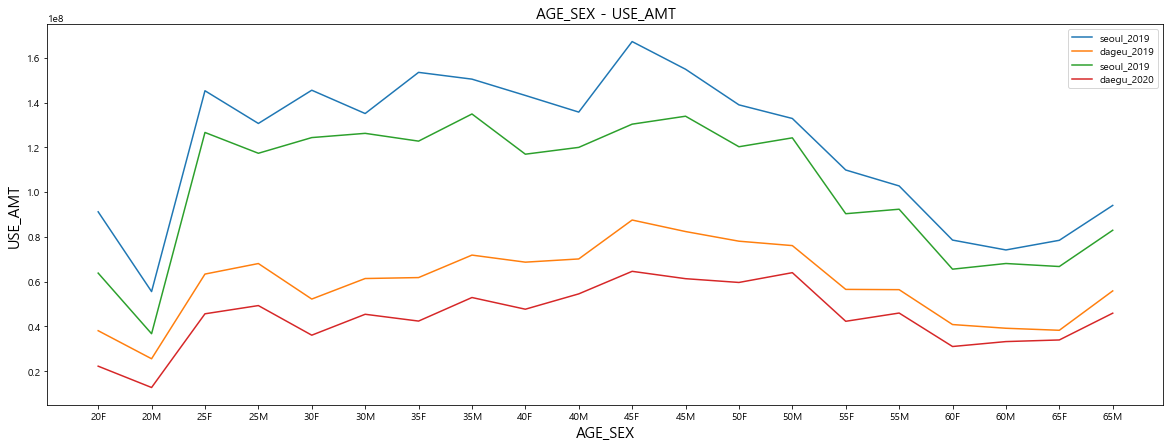

In [40]:
index = np.arange(len(label))

plt.figure(figsize = (20,7))

plt.subplot(1,1,1)
plt.plot(index, seoul_to_amt_2019,label='seoul_2019')
plt.plot(index, daegu_to_amt_2019,label='dageu_2019')
plt.plot(index, seoul_to_amt_2020,label='seoul_2019')
plt.plot(index, daegu_to_amt_2020,label='daegu_2020')

plt.xticks(index, label)
plt.xlabel('AGE_SEX', fontsize = 15)
plt.ylabel('USE_AMT', fontsize = 15)
plt.title("AGE_SEX - USE_AMT", fontsize = 15)
plt.legend()

plt.show()

In [86]:
foreign['COUNTRY_NM'].unique()

['대만', '독일', '미국', '미주', '영국', ..., '네덜란드', '정보없음', '카자흐스탄', '중동/아프리카', '오스트레일리아']
Length: 23
Categories (23, object): ['대만', '독일', '미국', '미주', ..., '정보없음', '카자흐스탄', '중동/아프리카', '오스트레일리아']

In [41]:
foreign.head()

,DATE,YEAR,MONTH,DAY,GU_CODE,DONG_CODE,INDUSTRY_CODE,COUNTRY_NM,USE_CNT,USE_AMT,SI_CODE,TOTAL_CODE
0,2019-02-04,2019,2,4,26,510,81,대만,2,30.0,27,2726510
1,2019-02-13,2019,2,13,26,510,40,대만,2,32.0,27,2726510
2,2019-04-16,2019,4,16,26,510,40,대만,2,16.0,27,2726510
3,2019-04-19,2019,4,19,26,510,42,대만,3,610.0,27,2726510
4,2019-03-08,2019,3,8,26,510,10,대만,7,629.0,27,2726510


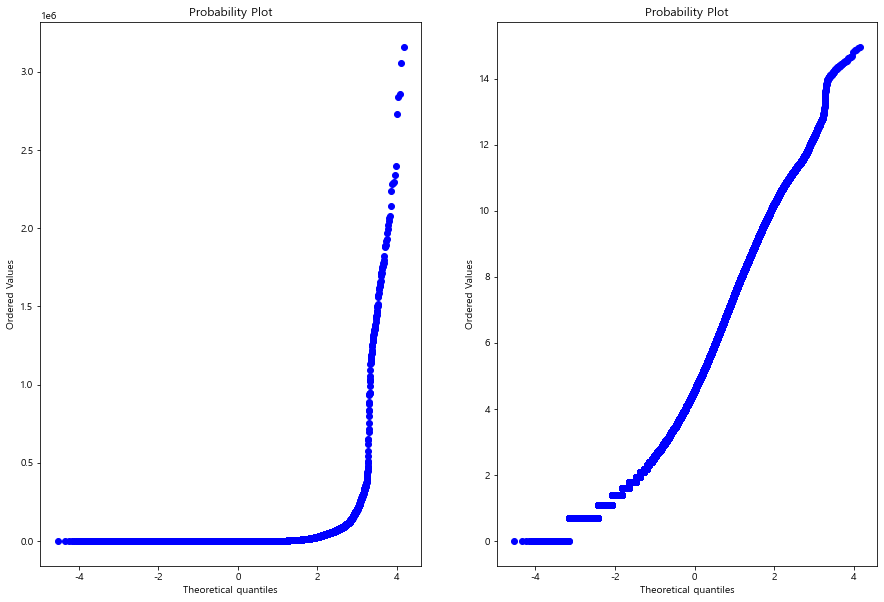

In [78]:
# 정규화를 통해 매출액의 분포가 정규분포를 가지도록 만듦
from scipy import stats #Analysis 

fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(foreign['USE_AMT'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(foreign['USE_AMT']), plot=plt)

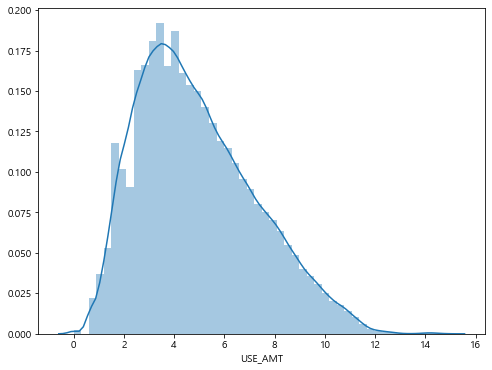

In [79]:
import seaborn as sns
# 정규분포를 가지도록 변환
foreign['USE_AMT'] = np.log1p(foreign['USE_AMT'])
# 히스토그램 
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(foreign['USE_AMT'])

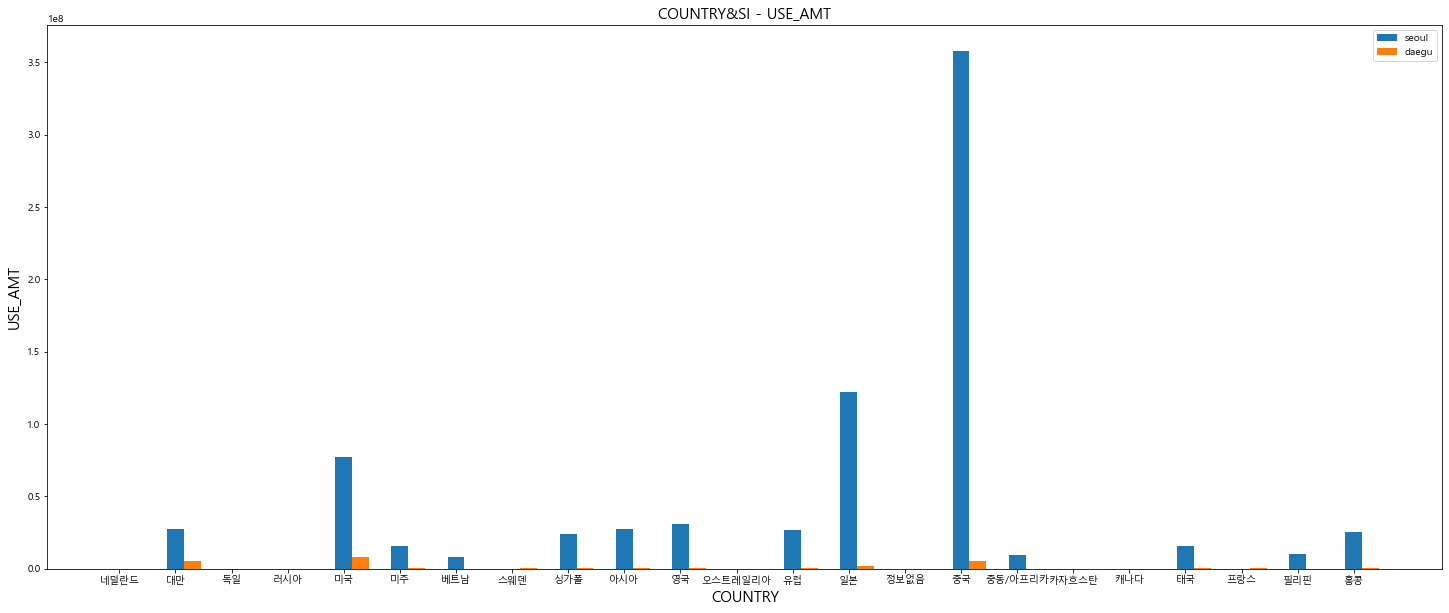

In [163]:
# 그래프 그리기
label = sorted(foreign['COUNTRY_NM'].unique())
index = np.arange(len(label))

plt.figure(figsize = (25,10))

plt.subplot(1,1,1)
plt.bar(index, amount_for[0::2],bar_width,label='seoul')
plt.bar(index+bar_width, amount_for[1::2],bar_width,label='daegu')
plt.xticks(index, label)
plt.xlabel('COUNTRY', fontsize = 15)
plt.ylabel('USE_AMT', fontsize = 15)
plt.title("COUNTRY&SI - USE_AMT", fontsize = 15)
plt.legend()

plt.show()

In [123]:
amount_for

COUNTRY_NM  SI_CODE
네덜란드        11              0.000000
            27           1027.612367
대만          11          53543.221654
            27          19253.054081
독일          11           3609.618583
            27              0.000000
러시아         11              0.000000
            27           2313.695293
미국          11         137086.295141
            27          96412.360535
미주          11          63000.552639
            27          16264.850984
베트남         11          26002.709210
            27           1445.762830
스웨덴         11              0.000000
            27           2056.480173
싱가폴         11          48289.826313
            27           5840.983784
아시아         11          64822.643779
            27          11126.673913
영국          11          48384.515298
            27           9176.423543
오스트레일리아     11           2973.620509
            27              0.000000
유럽          11          89374.373285
            27          14954.667797
일본          11    

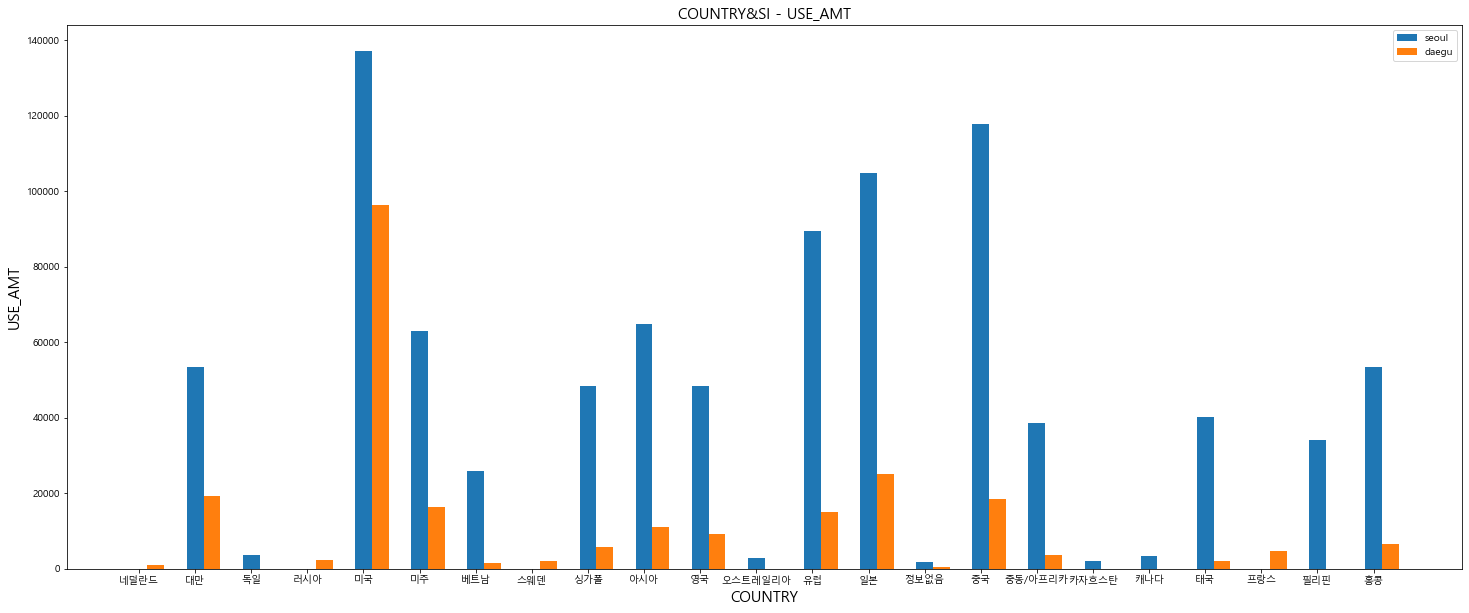

In [85]:
# 그래프 그리기
label = sorted(foreign['COUNTRY_NM'].unique())
index = np.arange(len(label))
bar_width = 0.3
plt.figure(figsize = (25,10))

plt.subplot(1,1,1)
plt.bar(index, amount_for[0::2],bar_width,label='seoul')
plt.bar(index+bar_width, amount_for[1::2],bar_width,label='daegu')
plt.xticks(index, label)
plt.xlabel('COUNTRY', fontsize = 15)
plt.ylabel('USE_AMT', fontsize = 15)
plt.title("COUNTRY&SI - USE_AMT", fontsize = 15)
plt.legend()

plt.show()